<a href="https://colab.research.google.com/github/Bibitpamungkas/praktikumML_314_321/blob/Praktikum/Modul_3_Tugas_Kelompok_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip install kaggle

In [3]:
%cd /content/gdrive/MyDrive/content/sample_data/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/content/sample_data/'
/content


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/tmp/"

In [5]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"bibitpamungkas","key":"0b4a500fd9a858ee152de296398002ab"}
import json
import zipfile
import os
with open('/tmp/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /tmp/kaggle.json

In [6]:
!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

 99% 1.73G/1.74G [00:42<00:00, 58.5MB/s]
100% 1.74G/1.74G [00:42<00:00, 44.0MB/s]


In [7]:
# Ekstrak dataset

import os
import zipfile

os.makedirs('/tmp/chest-xray-pneumoniacovid19tuberculosis')

local_zip = '/content/chest-xray-pneumoniacovid19tuberculosis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/chest-xray-pneumoniacovid19tuberculosis')
zip_ref.close()

In [8]:
import os
base_dir = '/tmp/chest-xray-pneumoniacovid19tuberculosis'
train = os.path.join(base_dir,'train')
validation = os.path.join(base_dir,'val')
test = os.path.join(base_dir,'test')

c19_tr = os.path.join(train,'COVID19')
c19_va = os.path.join(validation,'COVID19')
c19_ts = os.path.join(test,'COVID19')

nr_tr = os.path.join(train,'NORMAL')
nr_va = os.path.join(validation,'NORMAL')
nr_ts = os.path.join(test,'NORMAL')

pn_tr = os.path.join(train,'PNEUMONIA')
pn_va = os.path.join(validation,'PNEUMONIA')
pn_ts = os.path.join(test,'PNEUMONIA')

tb_tr = os.path.join(train,'TURBERCULOSIS')
tb_va = os.path.join(validation,'TURBERCULOSIS')
tb_ts = os.path.join(test,'TURBERCULOSIS')

#file training dan validation
file_train_c19 = os.listdir(c19_tr)
file_validation_c19 = os.listdir(c19_va)
file_test_c19 = os.listdir(c19_ts)
file_train_nr = os.listdir(nr_tr)
file_validation_nr = os.listdir(nr_va)
file_test_nr = os.listdir(nr_ts)
file_train_pn = os.listdir(pn_tr)
file_validation_pn = os.listdir(pn_va)
file_test_pn = os.listdir(pn_ts)
file_train_tb = os.listdir(tb_tr)
file_validation_tb = os.listdir(tb_va)
file_test_tb = os.listdir(tb_ts)

#Print jumlah data training dan validation
print("Data COVID19 Train : " + str(len(file_train_c19)))
print("Data COVID19 Validation : " + str(len(file_validation_c19)))
print("Data COVID19 Test : " + str(len(file_test_c19)))
print("Data NORMAL Train : " + str(len(file_train_nr)))
print("Data NORMAL Validation : " + str(len(file_validation_nr)))
print("Data NORMAL Test : " + str(len(file_test_nr)))
print("Data PNEUMONIA Train : " + str(len(file_train_pn)))
print("Data PNEUMONIA Validation : " + str(len(file_validation_pn)))
print("Data PNEUMONIA Test : " + str(len(file_test_pn)))
print("Data TURBERCULOSIS Train : " + str(len(file_train_tb)))
print("Data TURBERCULOSIS Validation : " + str(len(file_validation_tb)))
print("Data TURBERCULOSIS Test : " + str(len(file_test_tb)))

Data COVID19 Train : 460
Data COVID19 Validation : 10
Data COVID19 Test : 106
Data NORMAL Train : 1341
Data NORMAL Validation : 8
Data NORMAL Test : 234
Data PNEUMONIA Train : 3875
Data PNEUMONIA Validation : 8
Data PNEUMONIA Test : 390
Data TURBERCULOSIS Train : 650
Data TURBERCULOSIS Validation : 12
Data TURBERCULOSIS Test : 41


In [9]:
# TULIS KODE ANDA DISINI

from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1 / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

train_aug = augmen_gen.flow_from_directory(
    '/tmp/chest-xray-pneumoniacovid19tuberculosis/train',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (200,200),
    batch_size=batch_size,
    color_mode ='rgb'
)

val_aug = augmen_gen.flow_from_directory(
    '/tmp/chest-xray-pneumoniacovid19tuberculosis/val',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (200,200),
    batch_size= batch_size,
    color_mode ='rgb'
)

test_aug = augmen_gen.flow_from_directory(
    '/tmp/chest-xray-pneumoniacovid19tuberculosis/test',
    class_mode = 'categorical',
    shuffle=False,
    target_size = (200,200),
    batch_size=batch_size,
    color_mode ='rgb',
)

Found 6326 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


In [10]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# DEFINISIKAN MODEL ANDA DISINI

#Feature Selection
model = Sequential()

model.add(InputLayer(input_shape=[200,200,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 128)       0

In [11]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
H = model.fit(train_aug,steps_per_epoch=10,  batch_size=20, epochs=100, validation_data=test_aug, validation_steps=10, verbose=2)

Epoch 1/100
10/10 - 50s - loss: 2.9065 - acc: 0.4500 - val_loss: 0.8118 - val_acc: 0.5750
Epoch 2/100
10/10 - 18s - loss: 1.0496 - acc: 0.6219 - val_loss: 2.0320 - val_acc: 0.0938
Epoch 3/100
10/10 - 18s - loss: 0.8464 - acc: 0.6313 - val_loss: 1.2391 - val_acc: 0.3625
Epoch 4/100
10/10 - 18s - loss: 0.7888 - acc: 0.6750 - val_loss: 1.2728 - val_acc: 0.0750
Epoch 5/100
10/10 - 17s - loss: 0.8453 - acc: 0.6750 - val_loss: 1.2973 - val_acc: 0.4812
Epoch 6/100
10/10 - 17s - loss: 0.7833 - acc: 0.6875 - val_loss: 1.3444 - val_acc: 0.3219
Epoch 7/100
10/10 - 17s - loss: 0.7450 - acc: 0.7063 - val_loss: 1.6782 - val_acc: 0.0437
Epoch 8/100
10/10 - 18s - loss: 0.6598 - acc: 0.7344 - val_loss: 1.6800 - val_acc: 0.0000e+00
Epoch 9/100
10/10 - 17s - loss: 0.6067 - acc: 0.7188 - val_loss: 2.9760 - val_acc: 0.0000e+00
Epoch 10/100
10/10 - 18s - loss: 0.6758 - acc: 0.7531 - val_loss: 1.2094 - val_acc: 0.1406
Epoch 11/100
10/10 - 18s - loss: 0.5224 - acc: 0.7844 - val_loss: 1.4739 - val_acc: 0.2125


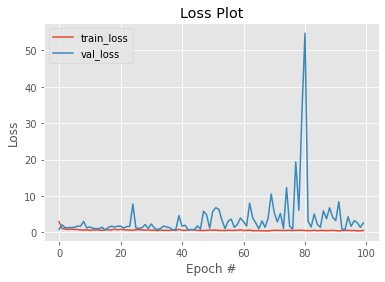

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

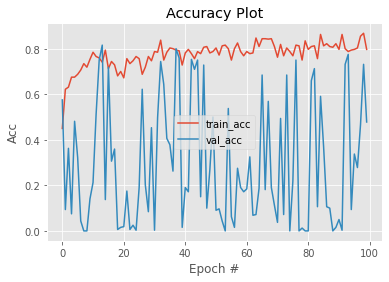

In [16]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report
ypred = model.predict(test_aug)
prediction = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction))

              precision    recall  f1-score   support

           0       0.46      0.79      0.58       106
           1       0.72      0.35      0.47       234
           2       0.71      0.79      0.75       390
           3       0.60      0.59      0.59        41

    accuracy                           0.65       771
   macro avg       0.62      0.63      0.60       771
weighted avg       0.67      0.65      0.64       771



In [ ]:
import tensorflow as tf
model.save('model1.h5')
new_model = tf.keras.models.load_model('model1.h5')

# Show the model architecture
new_model.summary()

In [19]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# DEFINISIKAN MODEL ANDA DISINI

#Feature Selection
model1 = Sequential()

model1.add(InputLayer(input_shape=[200,200,3]))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Dropout(0.25))
model1.add(BatchNormalization())
model1.add(Flatten())

#Fully Connected Layer
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(4, activation='softmax'))
print(model1.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 128)       0

In [20]:
# Compile model
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.00001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
H1 = model1.fit(train_aug,steps_per_epoch=10,  batch_size=20, epochs=100, validation_data=test_aug, validation_steps=10, verbose=2)

Epoch 1/100
10/10 - 20s - loss: 1.4211 - acc: 0.3938 - val_loss: 1.3441 - val_acc: 0.3625
Epoch 2/100
10/10 - 18s - loss: 1.1544 - acc: 0.5469 - val_loss: 1.3436 - val_acc: 0.2094
Epoch 3/100
10/10 - 18s - loss: 1.0579 - acc: 0.5625 - val_loss: 1.3159 - val_acc: 0.5188
Epoch 4/100
10/10 - 18s - loss: 0.9568 - acc: 0.6062 - val_loss: 1.3080 - val_acc: 0.5781
Epoch 5/100
10/10 - 17s - loss: 0.9954 - acc: 0.5844 - val_loss: 1.2977 - val_acc: 0.6531
Epoch 6/100
10/10 - 17s - loss: 0.8223 - acc: 0.6710 - val_loss: 1.3020 - val_acc: 0.5688
Epoch 7/100
10/10 - 18s - loss: 0.9095 - acc: 0.6344 - val_loss: 1.3105 - val_acc: 0.3844
Epoch 8/100
10/10 - 18s - loss: 0.9013 - acc: 0.6531 - val_loss: 1.3037 - val_acc: 0.3562
Epoch 9/100
10/10 - 18s - loss: 0.8101 - acc: 0.6750 - val_loss: 1.2718 - val_acc: 0.5938
Epoch 10/100
10/10 - 18s - loss: 0.9498 - acc: 0.6156 - val_loss: 1.2587 - val_acc: 0.6969
Epoch 11/100
10/10 - 18s - loss: 0.8557 - acc: 0.6562 - val_loss: 1.2659 - val_acc: 0.6187
Epoch 12

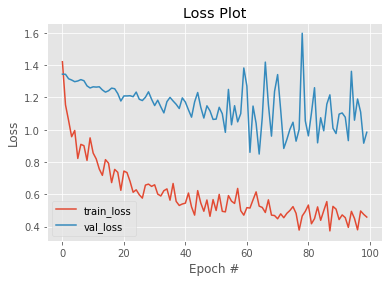

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H1.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

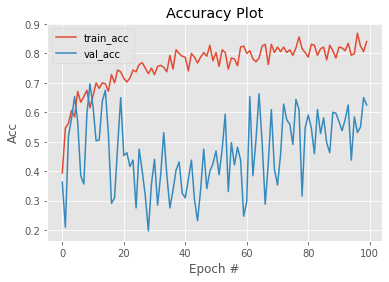

In [23]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H1.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H1.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import classification_report
ypred = model1.predict(test_aug)
prediction = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       106
           1       0.88      0.58      0.70       234
           2       0.75      0.95      0.84       390
           3       0.83      0.71      0.76        41

    accuracy                           0.79       771
   macro avg       0.83      0.74      0.77       771
weighted avg       0.81      0.79      0.79       771



In [ ]:
import tensorflow as tf
model1.save('model2.h5')
new_model1 = tf.keras.models.load_model('model2.h5')

# Show the model architecture
new_model1.summary()

In [31]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# DEFINISIKAN MODEL ANDA DISINI

#Feature Selection
model2 = Sequential()

model2.add(InputLayer(input_shape=[200,200,3]))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Flatten())

#Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4, activation='softmax'))
print(model2.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 128)      

In [32]:
# Compile model
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.0000001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:
H2 = model2.fit(train_aug,steps_per_epoch=10,  batch_size=20, epochs=100, validation_data=test_aug, validation_steps=10, verbose=2)

Epoch 1/100
10/10 - 21s - loss: 1.4682 - acc: 0.3438 - val_loss: 1.4233 - val_acc: 0.0156
Epoch 2/100
10/10 - 18s - loss: 1.4399 - acc: 0.3750 - val_loss: 1.4221 - val_acc: 0.0125
Epoch 3/100
10/10 - 17s - loss: 1.4042 - acc: 0.3871 - val_loss: 1.4214 - val_acc: 0.0063
Epoch 4/100
10/10 - 18s - loss: 1.3875 - acc: 0.3812 - val_loss: 1.4219 - val_acc: 0.0250
Epoch 5/100
10/10 - 17s - loss: 1.3667 - acc: 0.4437 - val_loss: 1.4199 - val_acc: 0.0312
Epoch 6/100
10/10 - 18s - loss: 1.4678 - acc: 0.3344 - val_loss: 1.4187 - val_acc: 0.0312
Epoch 7/100
10/10 - 17s - loss: 1.4063 - acc: 0.3562 - val_loss: 1.4178 - val_acc: 0.0406
Epoch 8/100
10/10 - 17s - loss: 1.3155 - acc: 0.4156 - val_loss: 1.4197 - val_acc: 0.0562
Epoch 9/100
10/10 - 17s - loss: 1.3413 - acc: 0.4094 - val_loss: 1.4176 - val_acc: 0.0406
Epoch 10/100
10/10 - 18s - loss: 1.3336 - acc: 0.4375 - val_loss: 1.4184 - val_acc: 0.0375
Epoch 11/100
10/10 - 18s - loss: 1.3437 - acc: 0.4000 - val_loss: 1.4165 - val_acc: 0.0406
Epoch 12

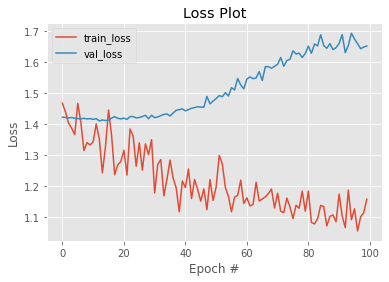

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

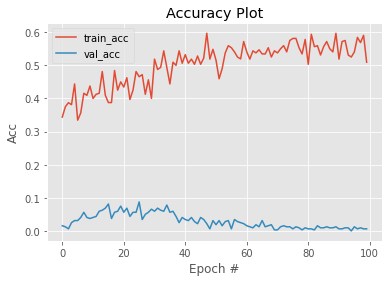

In [35]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import classification_report
ypred = model2.predict(test_aug)
prediction = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       106
           1       0.67      0.01      0.02       234
           2       0.51      0.99      0.68       390
           3       0.80      0.20      0.31        41

    accuracy                           0.52       771
   macro avg       0.62      0.30      0.26       771
weighted avg       0.57      0.52      0.37       771



In [37]:
import tensorflow as tf
model2.save('model3.h5')
new_model2 = tf.keras.models.load_model('model3.h5')

# Show the model architecture
new_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 128)      